In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
from classy import *

Version:  0.0.31


In [3]:
with open('data/simple_classification.csv','w') as fid:
    fid.write("durability,strength,target\n")
    fid.write("7,7,bad\n")
    fid.write("7,4,bad\n")
    fid.write("3,4,good\n")
    fid.write("1,4,good\n")

data=load_csv('data/simple_classification.csv')

4 vectors of length 2
Feature names: 'durability', 'strength'
Target values given.
Target names: 'bad', 'good'
Mean:  [4.5  4.75]
Median:  [5. 4.]
Stddev:  [2.59807621 1.29903811]


In [4]:
data.vectors

array([[7., 7.],
       [7., 4.],
       [3., 4.],
       [1., 4.]])

In [5]:
prototype_bad=data.vectors[:2,:].mean(axis=0)
prototype_bad

array([7. , 5.5])

In [6]:
prototype_good=data.vectors[2:,:].mean(axis=0)
prototype_good

array([2., 4.])

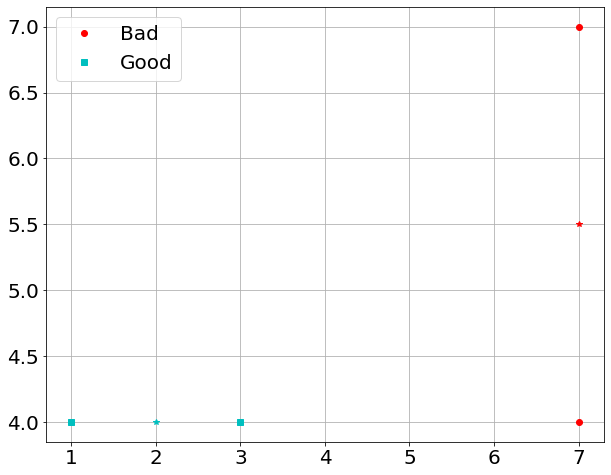

In [7]:
plt.plot(data.vectors[:2,0],data.vectors[:2,1],'ro',label='Bad')
plt.plot(data.vectors[2:,0],data.vectors[2:,1],'cs',label='Good')
plt.plot(*prototype_bad,'r*')
plt.plot(*prototype_good,'c*')
plt.legend()

In [8]:
data.vectors[2:,:]

array([[3., 4.],
       [1., 4.]])

In [12]:
def plot_distance(vector1,vector2):
    
    plt.plot([vector1[0],vector2[0]],[vector1[1],vector2[1]],'k--',lw=1)
    
    mean=(vector1+vector2)/2
    distance=sqrt(((vector1-vector2)**2).sum())
    
    plt.text(mean[0],mean[1]+.2,f'{distance:.3f}')
    
    return distance

## New point, Naive Bayes

In [13]:
new=array([3,7])

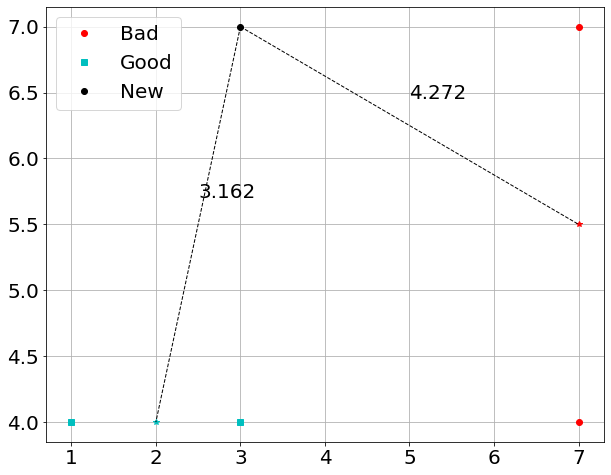

In [15]:
plt.plot(data.vectors[:2,0],data.vectors[:2,1],'ro',label='Bad')
plt.plot(data.vectors[2:,0],data.vectors[2:,1],'cs',label='Good')
plt.plot(*prototype_bad,'r*')
plt.plot(*prototype_good,'c*')

plt.plot(*new,'ko',label='New')

plot_distance(new,prototype_bad)
plot_distance(new,prototype_good)

plt.legend()

Naive Bayes Classifies the new point as Good.

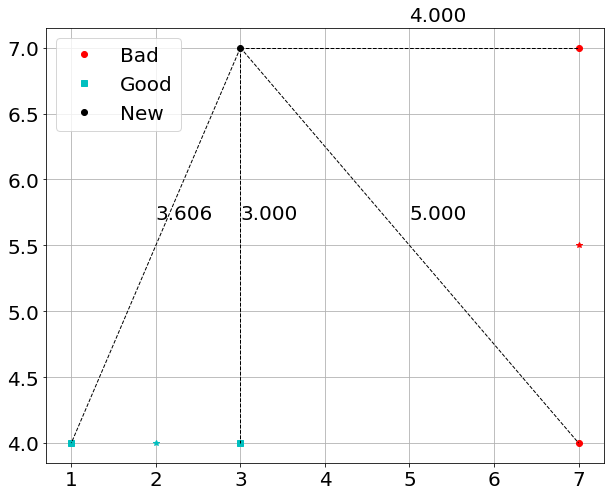

In [16]:
plt.plot(data.vectors[:2,0],data.vectors[:2,1],'ro',label='Bad')
plt.plot(data.vectors[2:,0],data.vectors[2:,1],'cs',label='Good')
plt.plot(*prototype_bad,'r*')
plt.plot(*prototype_good,'c*')

plt.plot(*new,'ko',label='New')

for vec in data.vectors:
    plot_distance(new,vec)

plt.legend()

- Nearest Neighbor (aka 1-Nearest Neighbor) classifies the new point as Good (min = 3.0)
- 3-Nearest Neighbor classifies the new point as Good (three closest: 3=good, 3.6=good, 4=bad  == more good than bad, so good wins)